# A Pandas könyvtár

Mérési vagy szimulációs adatainkat gyakran célszerűbb a puszta számokat tartalmazó *list* vagy *numpy.array* adatszerkezet helyett a *pandas* könyvtár *DataFrame* osztályában tárolunk, ahol a számok mellett feliratozni is tudjuk a sorokat, illetve oszlopokat, illetve a különböző oszlopokban különböző adattípusok lehetnek.

A *DataFrame*-re gondolhatunk úgy, mint egy szokásos Excel-táblázatra, az osztályhoz tartozó függvények egy része ugyanis nagyon hasonlít a táblázatkezelőkből ismertekére. Használata első ránézésre talán bonyolultnak tűnhet, de mindenképpen megéri a befektetett energiát.

A szokásos import:

In [1]:
import pandas as pd

## Beolvasás fájlból

Ha már az Excelt emlegettük, tényleg beolvashatunk xls-fájlokat. A notebook szépen formázza a kimenetet.

In [2]:
pd.read_excel("kisnevsor.xlsx")

,Eszter,Orsi,Nem,Kor
Bálint,2,3,fiú,20
Csenge,4,4,lány,22
István,5,4,fiú,19
Zita,3,5,lány,20


Legtöbbször azonban vesszővel vagy tabulátorral elválasztott értékeket (amit a `sep` kulcsszóval állíthatunk be, ha szükséges) olvasunk be egyszerű szövegfájlokból. Itt be kell állítanunk, hogy a táblázatunk tartalmaz-e fejlécet (`header`), illetve hogy a soroknak van-e nevük (`index`).

Az alapértelmezett beállítás megpróbálja kitalálni, hogy van-e fejléc, és a sorokat magától megszámozza.

In [3]:
pd.read_csv("kisnevsor.csv")

,Unnamed: 0,Eszter,Orsi,Nem,Kor
0,Bálint,2,3,fiú,20
1,Csenge,4,4,lány,22
2,István,5,4,fiú,19
3,Zita,3,5,lány,20


Mi viszont azt szeretnénk, ha a legelső oszlopot a sorok neveiként olvasnánk be, mint az exceles esetben.

In [4]:
pd.read_csv("kisnevsor.csv",index_col=0)

,Eszter,Orsi,Nem,Kor
Bálint,2,3,fiú,20
Csenge,4,4,lány,22
István,5,4,fiú,19
Zita,3,5,lány,20


Most a fejlécbeolvasót kikapcsoljuk. Így az első sor ismeretlen (`NaN`) sorfelirattal bekerül az értékek elé, az oszlopok pedig 0-tól számozódnak.

In [5]:
pd.read_csv("kisnevsor.csv",header=None,index_col=0)

,1,2,3,4
0,,,,
NaN,Eszter,Orsi,Nem,Kor
Bálint,2,3,fiú,20
Csenge,4,4,lány,22
István,5,4,fiú,19
Zita,3,5,lány,20


## Adatok elérése

A *pandas* a *DataFrame*-ben tárolt értékeket elsősorban a fejléccel és a sorok neveivel teszi elérhetővé.

Ha egy oszlop nevét *string*ként szögletes zárójelekben írjuk a *DataFrame* neve mögé, visszakapjuk az oszlopot.

In [6]:
df=pd.read_csv("kisnevsor.csv",index_col=0)
print(df["Eszter"])

Bálint    2
Csenge    4
István    5
Zita      3
Name: Eszter, dtype: int64


Ha több oszlopot is vissza szeretnénk kapni, akkor azokat egy stringeket tartalmazó listában írjuk a *DataFrame* mögötti szögletes zárójelbe.

In [7]:
df[["Eszter","Nem","Kor"]]

,Eszter,Nem,Kor
Bálint,2,fiú,20
Csenge,4,lány,22
István,5,fiú,19
Zita,3,lány,20


Ha egy oszlopnak szeretnénk elérni az egyik elemét:

In [8]:
print(df["Eszter"]["Zita"])

3


Vigyázat, mindig először az oszlop nevét írtuk! Ha egy sort szeretnénk visszakapni, az `ix` objektumot kell használunk.

In [9]:
df.ix["Zita"]

Eszter       3
Orsi         5
Nem       lány
Kor         20
Name: Zita, dtype: object

Aki szeretné ugyanúgy számokkal indexelni a *DataFrame*-et, mint egy *array*-t, annak erre az `iloc` biztosít lehetőséget. Nézzük meg az előző eléréseket `iloc`-kal!

In [10]:
df.iloc[:,0] # az első (0.) oszlop

Bálint    2
Csenge    4
István    5
Zita      3
Name: Eszter, dtype: int64

In [11]:
df.iloc[0,0]  # az első sor első eleme

2

Sőt, a *DataFrame* belsejét átalakíthatjuk *numpy* *array*-jé, és alkalmazhatjuk rá a korábban tanult módszereket :-)

In [12]:
df.as_matrix()

array([[2, 3, 'fiú', 20],
       [4, 4, 'lány', 22],
       [5, 4, 'fiú', 19],
       [3, 5, 'lány', 20]], dtype=object)

### Az oszlopnevek és a sornevek elérése

Írassuk ki a táblázatunk oszlopainak a nevét!

In [13]:
df.columns

Index(['Eszter', 'Orsi', 'Nem', 'Kor'], dtype='object')

Írassuk ki a táblázatunk sorainak a nevét!

In [14]:
df.index

Index(['Bálint', 'Csenge', 'István', 'Zita'], dtype='object')

Szükség lehet rá, hogy a fenti listákat tényleg Python-féle *list*-ként kapjuk vissza.

In [15]:
df.columns.tolist()

['Eszter', 'Orsi', 'Nem', 'Kor']

In [16]:
list(df.columns)

['Eszter', 'Orsi', 'Nem', 'Kor']

## Egyszerű sor- és oszlopműveletek

A *DataFrame*-re is könnyű néhány beépített függvény segítségével különböző aggregált értékeket számolni.

Például álljon itt oszloponként a számok összege:

In [17]:
df.sum()

Eszter                14
Orsi                  16
Nem       fiúlányfiúlány
Kor                   81
dtype: object

Mit tegyünk, ha ezt soronként szeretnénk visszakapni? Változtassuk meg az összegzés "tengelyét" (`axis`)! Az előző eset ugyanis az alapértelmezett `axis=0` volt, ami oszloponként végzi a műveletet. Csak a jegyeket tartalmazó oszlopokat összegezzük.

In [18]:
df[["Eszter","Orsi"]].sum(axis=1)

Bálint    5
Csenge    8
István    9
Zita      8
dtype: int64

Számoltassuk meg, hány elem van az oszlopokban, illetve a sorokban!

In [19]:
df.count()

Eszter    4
Orsi      4
Nem       4
Kor       4
dtype: int64

In [20]:
df.count(axis=1)

Bálint    4
Csenge    4
István    4
Zita      4
dtype: int64

Ezt persze az *array*-hez hasonlóan is megtehettük volna:

In [21]:
df.shape

(4, 4)

További ötletek beépített függvényekre: `mean, median, min, max, std`.

## Boolean indexing

Nagyon gyakran előfordul, hogy a táblázatunkból csak bizonyos feltételeknek megfelelő sorokat szeretnénk látni. Ha a táblázat sorainak számával megegyező hosszú igaz/hamis sorozatot adunk meg a *DataFrame* mögötti szögletes zárójelben, akkor csak az igaz elemeket fogjuk visszakapni visszatérési értékként.

Először nézzük meg, mi történik, ha megkérdezzük, hogy egy oszlop egyenlő-e egy értékkel:

In [22]:
df["Nem"]=="lány"

Bálint    False
Csenge     True
István    False
Zita       True
Name: Nem, dtype: bool

Láttuk, hogy minden sorhoz kaptunk egy igaz/hamis értéket. Most a fenti kifejezést beírjuk a `[]`-be:

In [23]:
df[df["Nem"]=="lány"]

,Eszter,Orsi,Nem,Kor
Csenge,4,4,lány,22
Zita,3,5,lány,20


De más feltételt is megadhatunk, például hogy kinek adott Eszter 3-asnál jobb jegyet.

In [24]:
df[df["Eszter"]>3]

,Eszter,Orsi,Nem,Kor
Csenge,4,4,lány,22
István,5,4,fiú,19


Két feltételt összefűzhetünk egymáshoz, ilyenkor a `&` és a `|` operátorokat használjuk **and** és **or** helyett, mert azok nem tudnak két sorozatot elemenként összehasonlítani. A feltételeket zárójelbe kell tenni, különben hibát kapunk.

Ezek alapján az, akinek Eszter hármasnál jobbat adott, és idősebb 20 évesnél:

In [25]:
df[(df["Eszter"]>3) & (df["Kor"]>20)]

,Eszter,Orsi,Nem,Kor
Csenge,4,4,lány,22


## Sorba rendezés

Szükségünk lehet arra, hogy a táblázatunkat sorba rendezzük valamelyik oszlop szerint. Ilyenkor a `sort_values(by="oszlop_neve")` függvényt használjuk, melynek megadhatjuk, hogy növekvő (`ascending=True`), vagy csökkenő (`ascending=False`) sorrendben szeretnénk-e a rendezést.

A függvény visszatérési értéke a rendezett táblázat.

In [26]:
df.sort_values(by="Kor",ascending=False)

,Eszter,Orsi,Nem,Kor
Csenge,4,4,lány,22
Bálint,2,3,fiú,20
Zita,3,5,lány,20
István,5,4,fiú,19


Ha azt szeretnénk, hogy az eredeti *DataFrame*-ben rendezve tárolódjanak el a sorok, be kell kapcsolnunk az `inplace=True` paramétert, ami felülírja a *DataFrame*-et a rendezés után.

In [27]:
df.sort_values(by="Kor",ascending=False,inplace=True)

Persze, ezt elérhettük volna szokásos értékadással is.

In [28]:
df=df.sort_values(by="Kor",ascending=False)

Ha a *DataFrame* indexe szerint szeretnénk sorba rendezni, akkor a `sort_index()` függvény segít (itt is választhatjuk, hogy helyben szeretnénk-e a rendezést az `inplace=True` segítségével):

In [29]:
df.sort_index(inplace=True)

## Új sor/oszlop hozzáadása, törlés

Ha új sort szeretnénk hozzáadni a táblázathoz, akkor a `.loc["Új_sor_indexe"]` változónak egy, az oszlopok számával megegyező hosszúságú listát kell odaadnunk.

In [30]:
df.loc["Dávid"]=[5,5,"fiú",20]
df

,Eszter,Orsi,Nem,Kor
Bálint,2,3,fiú,20
Csenge,4,4,lány,22
István,5,4,fiú,19
Zita,3,5,lány,20
Dávid,5,5,fiú,20


Ha új oszlopot, akkor hasonlóan járunk el, de nem szükséges a `loc`, mert az a sorokat indexeli.

In [31]:
df["Emelt"]=[0,0,1,1,0]
df

,Eszter,Orsi,Nem,Kor,Emelt
Bálint,2,3,fiú,20,0
Csenge,4,4,lány,22,0
István,5,4,fiú,19,1
Zita,3,5,lány,20,1
Dávid,5,5,fiú,20,0


Ha sort szeretnénk törölni, a `drop` függvénnyel tehetjük meg.

In [32]:
df.drop("Bálint",inplace=True)
df

,Eszter,Orsi,Nem,Kor,Emelt
Csenge,4,4,lány,22,0
István,5,4,fiú,19,1
Zita,3,5,lány,20,1
Dávid,5,5,fiú,20,0


Elég ritkán, de szeretnénk a táblázatunkból oszlopokat törölni:

In [33]:
del df["Kor"] #ritkán

In [34]:
df["Kor"]=[22,19,20,20]

## Csoportosítás

Egy oszlop értékei szerint csoportosíthatjuk a *DataFrame*-et, és utána a csoportokon végezhetünk műveleteket.

Például az emelt szintű érettségit tevők (1), illtve nem tevők (0) maximum jegyeit láthatjuk a következő sorban.

Figyeljük meg, hogy a `Nem` oszlop maximális értéke mindkét csoportban a `"lány"`, hiszen az hátrébb áll az abc-ben, mint a fiú.

In [35]:
df.groupby("Emelt").max()

,Eszter,Orsi,Nem,Kor
Emelt,,,,
0,5,5,lány,22
1,5,5,lány,20


Egyszerre két oszlop szerint is csoportosíthatunk, ilyenkor listát kell a `groupby`-nak átadnunk. Itt már nem csak az `Emelt` oszlop, hanem a `Nem` oszlop is a táblázat indexének a része, ezt hívjuk többszintű indexelésnek. A továbbiakban az órán erre nem lesz szükség, csak a példa kedvéért áll itt.

In [36]:
df.groupby(["Emelt","Nem"]).max()

Eszter  Orsi  Kor
Emelt Nem                    
0     fiú        5     5   20
      lány       4     4   22
1     fiú        5     4   19
      lány       3     5   20

## Ábrázolás

A `pandas` nagy erőssége, hogy a *DataFrame*-ekből nagyon rövid szintaxissal lehet egészen elfogadható ábrákat készíteni. Ehhez a `pandas` a `matplotlib` könyvtárat használja, melyet emiatt be is kell importálnunk.

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

Az ábra paramétereit a `matplotlib`ben megszokott módon állíthatjuk be.

Például megadhatjuk az ábra méretét:

In [38]:
plt.rcParams["figure.figsize"]=10,7

Nézzük meg, hogy az egyes emebreknek Eszter és Orsi milyen jegyet adott! A `kind="bar"` kulcsszó mondja meg, hogy oszlopdiagramot szeretnénk rajzolni. (A `scatter` például pontokat tesz, a `line` vonalat rajzol.)

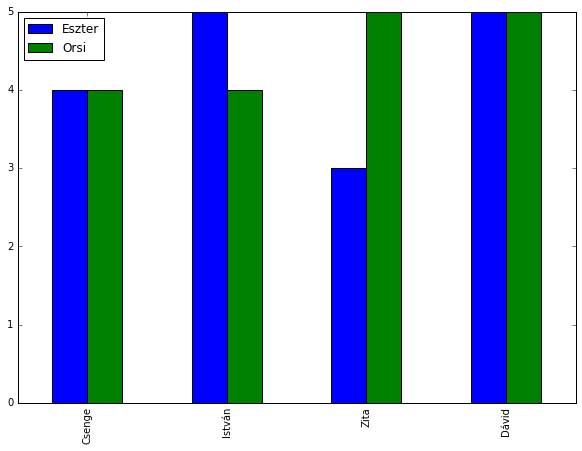

In [39]:
df[["Eszter","Orsi"]].plot(kind="bar")

# Haladóknak

## Összefűzés, join

Két *DataFrame*-et összefűzhetünk egymás alá, ha a `pd.concat()` függvénynek egy ugyanannyi oszlopból álló *DataFrame*-eket tartalmazó listát adunk oda.

Példánkban kétszer egymás alá írjuk ugyanazt a *DataFrame*-et.

In [40]:
pd.concat([df,df])

,Eszter,Orsi,Nem,Emelt,Kor
Csenge,4,4,lány,0,22
István,5,4,fiú,1,19
Zita,3,5,lány,1,20
Dávid,5,5,fiú,0,20
Csenge,4,4,lány,0,22
István,5,4,fiú,1,19
Zita,3,5,lány,1,20
Dávid,5,5,fiú,0,20


Létrehozunk egy másik *DataFrame*-et, és egy `Énekkar` nevű oszlopot teszünk bele az előző *DataFrame* indexeivel.

In [41]:
import numpy as np
df2=pd.DataFrame(np.array([[0,1,1,1]]).transpose(),columns=["Énekkar"],index=df.index)
df2

,Énekkar
Csenge,0
István,1
Zita,1
Dávid,1


Hogyan tudnánk ezt az oszlopot hozzáilleszteni az előző táblázathoz? Megtehetjük `concat` segítségével, de át kell állítanunk, hogy melyik irányban fűzzük össze a két táblázatot (`axis=1` jelenti, hogy az oszlopok mellé szeretnénk írni).

In [42]:
pd.concat([df,df2],axis=1)

,Eszter,Orsi,Nem,Emelt,Kor,Énekkar
Csenge,4,4,lány,0,22,0
István,5,4,fiú,1,19,1
Zita,3,5,lány,1,20,1
Dávid,5,5,fiú,0,20,1


Megtehetnénk azt is, hogy elkészítjük a két táblázat Descartes-szorzatát, azaz az egyikből minden sort összepárosítunk a másik minden sorával, majd kiválogatjuk ebből a sorhalmazból csak azokat a sorokat, amelyekben az indexek megegyeznek.

(Aki ismeri az SQL-nyelv `join` parancsát, ez az ún. `inner join`.)

In [43]:
pd.merge(df,df2,left_index=True,right_index=True)

,Eszter,Orsi,Nem,Emelt,Kor,Énekkar
Csenge,4,4,lány,0,22,0
István,5,4,fiú,1,19,1
Zita,3,5,lány,1,20,1
Dávid,5,5,fiú,0,20,1


## Contains

Ha egy stringeket tartalmazó oszlopban végig kell néznünk, hogy megvan-e valamilyen karaktersorozat:

In [44]:
df["Nem"].str.contains("án")

Csenge     True
István    False
Zita       True
Dávid     False
Name: Nem, dtype: bool

## Apply

Ha egy tetszőleges függvényt szeretnénk egy oszlop minden egyes elemére alkalmazni, megtehetjük az `apply` segítségével. Az apply belsejébe írjuk a függvényt, amit alkalmazni szeretnénk.

Elsőként például készítünk egy függvényt, ami egy számhoz hozzáad egyet:

In [45]:
def hozzaad(x):
    return x+1

Ezek után mindenkit öregítünk egy évvel.

In [46]:
df["Kor"].apply(hozzaad)

Csenge    23
István    20
Zita      21
Dávid     21
Name: Kor, dtype: int64

## Pivot

Új táblázatot is készíthetünk összesített eredmények alapján az eredetiből. Hogy legyen valami látható eredményünk, adjuk még hozzá Károlyt a táblázatunkhoz.

In [47]:
df.loc["Károly"]=[4,5,"fiú",1,20]

Most megnézzünk nemenként és emelt szintű érettségi szerint, hogy melyik kategóriában hány ember van. Mivel a csoportosítás készít nekünk egy többszintű indexet, ezt kiiktatjuk a `reset_index(inplace=True)` parancs segítségével.

In [48]:
p=df.groupby(["Nem","Emelt"]).count()
p.reset_index(inplace=True)
p

,Nem,Emelt,Eszter,Orsi,Kor
0,fiú,0,1,1,1
1,fiú,1,2,2,2
2,lány,0,1,1,1
3,lány,1,1,1,1


Készítsünk egy táblázatot, melyben a sorok a nemek, az oszlopok, hogy tett-e valaki emelt szintű érettségit, és az értékek a kategóriák leszámlálásai:

In [49]:
p.pivot_table(values="Eszter",columns="Emelt",index="Nem")

Emelt,0,1
Nem,,
fiú,1,2
lány,1,1
